In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
import random
import matplotlib.pyplot as plt

In [4]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

val_size = int(len(X_test) * 0.2)
X_val = X_test[:val_size]
y_val = y_test[:val_size]
X_test = X_test[val_size:]
y_test = y_test[val_size:]

In [5]:
# normalize the input data to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
# create a sequential model
model = Sequential()

# add the convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [7]:
# add the dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [8]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10


2023-02-01 00:40:54.259730: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 22s 11ms/step - loss: 0.1461 - accuracy: 0.9553 - val_loss: 60.2166 - val_accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 114.7675 - val_accuracy: 0.8760
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 140.1815 - val_accuracy: 0.8550
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 46.0998 - val_accuracy: 0.9470
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 60.3179 - val_accuracy: 0.9350
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 67.6212 - val_accuracy: 0.9340
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 78.8014 - v

In [10]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

250/250 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9895
Test accuracy: 0.9894999861717224


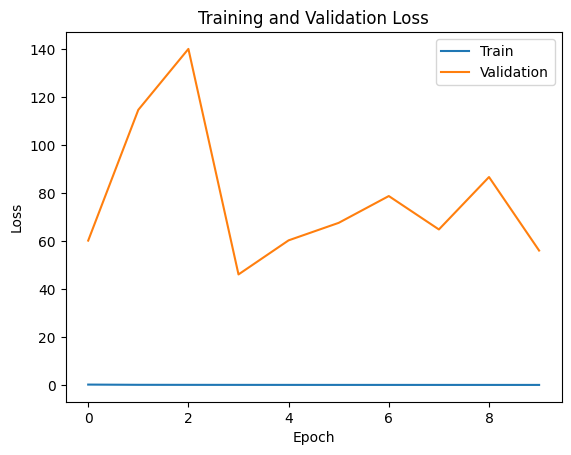

In [11]:
# plot a plot of the model performance
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

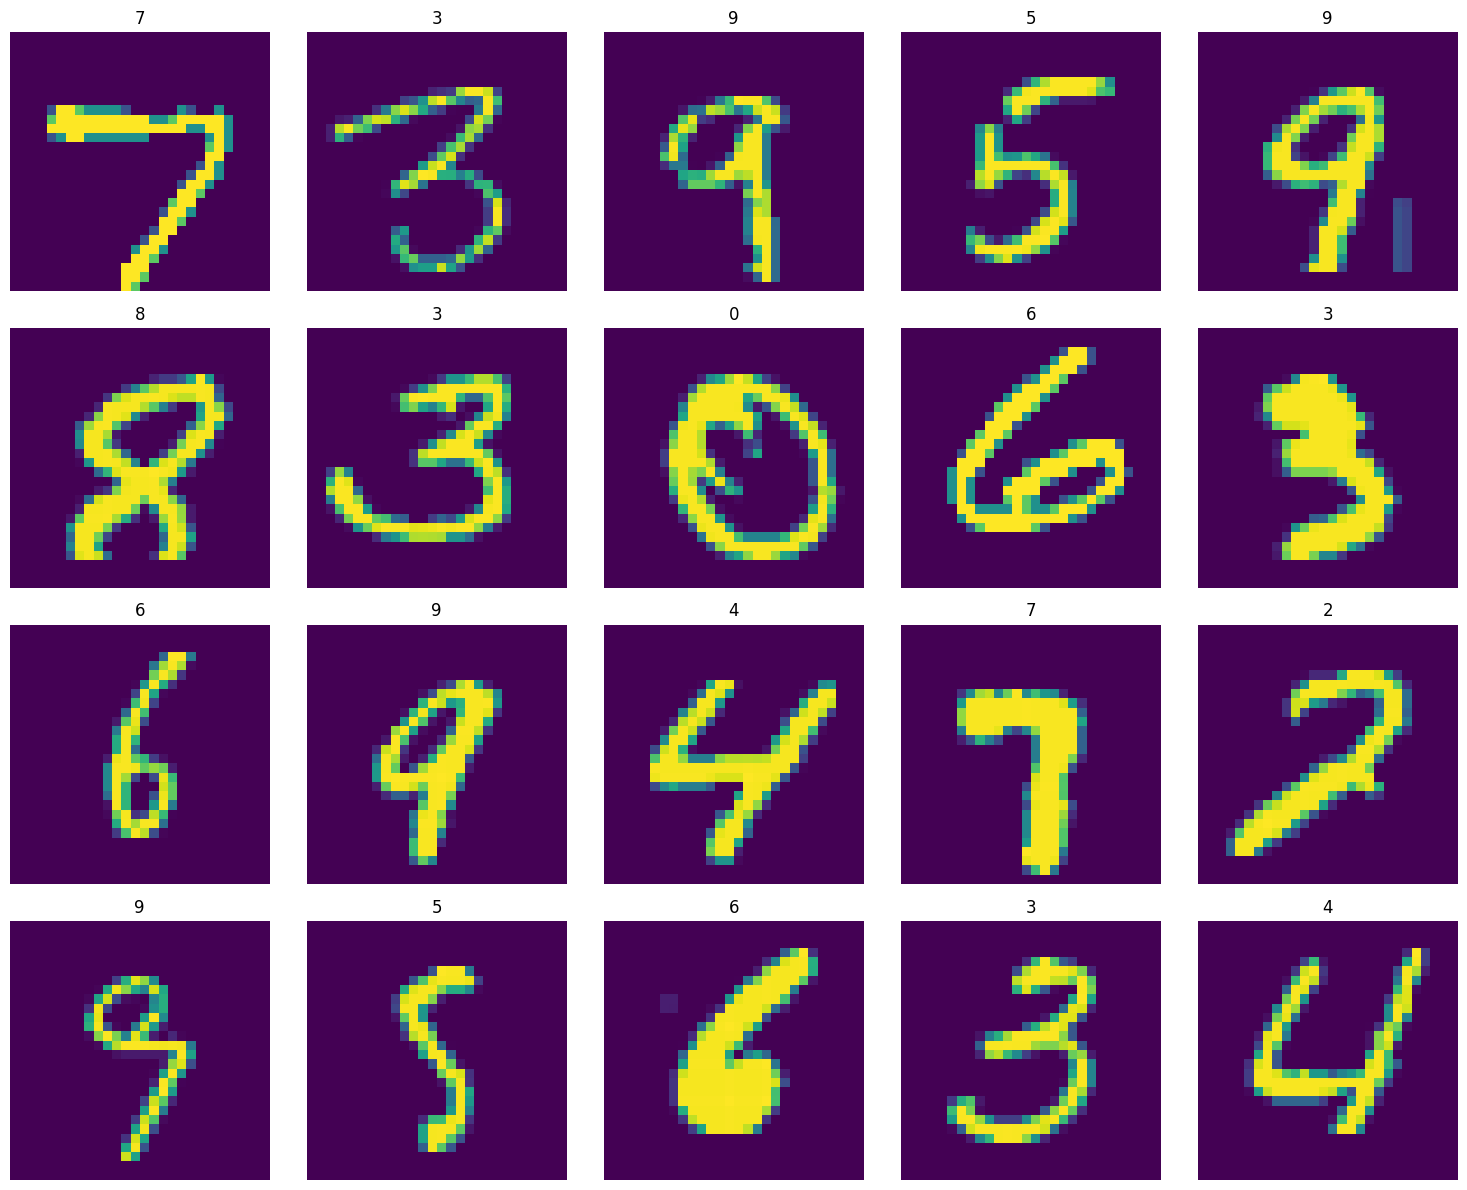

In [12]:
# Choose 20 random indices from the training set
indices = random.sample(range(len(X_train)), 20)
# Plot the images and labels in a 4x5 grid
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.imshow(X_train[indices[i]])
    ax.set_title(str(y_train[indices[i]]))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# print the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

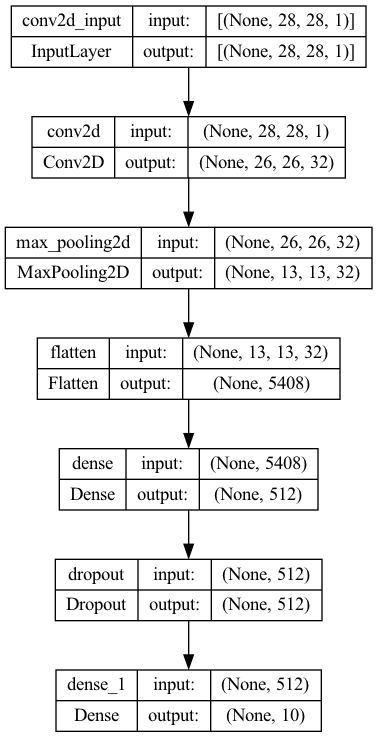

In [14]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [15]:
# save the model to disk
model.save('mnist_model.h5')

In [16]:
# prediction class definition
import numpy as np
from keras.models import load_model

class Predictor:
    def __init__(self):
        self.model = None

    def predict(self, image):
        # Load the model if it hasn't been loaded
        if self.model is None:
            self.model = load_model('mnist_model.h5')

        # Reshape the image to match the model's input shape
        image = np.reshape(image, (1, 28, 28, 1))

        # Make a prediction
        prediction = self.model.predict(image)

        # Return the predicted label
        return np.argmax(prediction)


In [17]:
# predict labels for 10 random images
import numpy as np
from keras.models import load_model

class Predictor:
    def __init__(self):
        self.model = None
        
    def predict(self, image):
        if self.model is None:
            self.model = load_model('mnist_model.h5')
        return np.argmax(self.model.predict(image.reshape(1, 28, 28, 1)))

# Load the test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.astype('float32') / 255

# Initialize the Predictor
predictor = Predictor()

# Predict 10 random images from the test set
indices = np.random.randint(0, X_test.shape[0], size=10)
for i in indices:
    image = X_test[i]
    prediction = predictor.predict(image)
    print("Image:")
    print(image)
    print("Prediction:", prediction)
    print("Actual Label:", y_test[i])
    print("\n")


1/1 [==============================] - 0s 64ms/step
Image:
[[0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.   

313/313 [==============================] - 1s 3ms/step


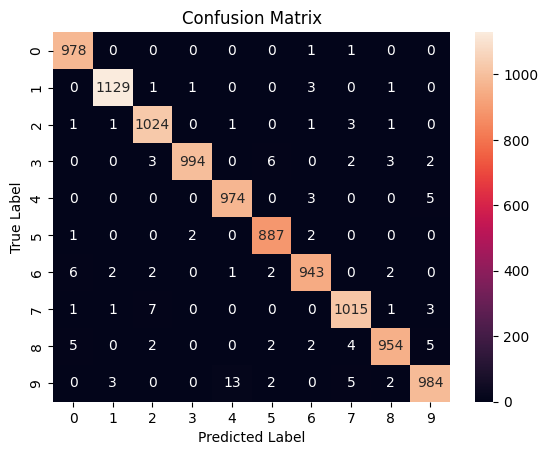

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# predict the test set
y_pred = model.predict(X_test)

# convert the predictions to categorical
y_pred_class = np.argmax(y_pred, axis=1)

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()